In [58]:
import numpy as np
from collections import Counter
import pickle
import matplotlib.pyplot as plt
from decisiontree import DecisionTree
from utils import divide_intervalles, train_test_data, validation_croisee

Coder une fonction entropie(vect) qui calcule l’entropie de ce vecteur

In [2]:
def entropie(vect):
    c = Counter()
    c.update(vect)
    probas = np.array(list(c.values())) / len(vect)
    return -np.array([y * np.log(y) for y in probas]).sum()

def cond_entropie(list_vect):
    res = 0
    total = np.array([len(v) for v in list_vect]).sum()
    for vect in list_vect:
        res += (len(vect)/total) * entropie(vect)
    return res

In [52]:
entropie([1,0,0]) - cond_entropie([[1,0],[0]])

0.17441604792151594

In [4]:
import pickle
import numpy as np
# data : tableau ( films , features ) , id2titles : dictionnaire id -> titre ,
# fields : id feature -> nom
[ data , id2titles , fields ]= pickle.load(open("imdb_extrait.pkl","rb"))
# la derniere colonne est le vote
datax = data [: ,:32]
datay = np.array([1 if x [33] >6.5 else -1 for x in data ])

binary_columns = data[:,:27]
N = len(data)
print(N)

4587


In [8]:
for attribute in range(binary_columns.shape[1]):
    x = binary_columns[:,attribute]
    entr = entropie(x)
    idx = np.where(binary_columns[:, attribute] == 1)[0]
    entr_cond = cond_entropie(binary_columns[idx])
    print(str(entr) + " - " + str(entr_cond))

0.391612101839 - 0.387697688437
0.502990577458 - 0.374044947069
0.522698604361 - 0.35440015897
0.182577604245 - 0.457329730463
0.133519960773 - 0.357630485379
0.657644559269 - 0.330455741382
0.183910571343 - 0.371167324699
0.370626735941 - 0.31022426541
0.0280491213059 - 0.376154061964
-0.0 - 0
-0.0 - 0
-0.0 - 0
0.631093770102 - 0.373202570113
0.0922641395842 - 0.348361611361
0.342591239375 - 0.388612040493
0.00544934082635 - 0.38756701502
-0.0 - 0
0.693090123033 - 0.332181180594
0.561675545181 - 0.390205234763
0.0405061769458 - 0.236832775689
0.122705948469 - 0.408204004216
0.158489482929 - 0.364718390455
0.312101795903 - 0.423542893525
0.479345020202 - 0.406040088193
0.356618295421 - 0.409782009541
-0.0 - 0
0.136548708034 - 0.338341210815


In [6]:
binary_columns

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [54]:
dt = DecisionTree()
dt.max_depth = 10
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
dt.fit(datax , datay )
#dt.predict( datax [:5 ,:])
print(dt.score( datax , datay ))
# dessine l ’ arbre dans un fichier pdf si pydot est installe .
#dt.to_pdf("/tmp/test_tree.pdf ",fields)
# sinon utiliser http :// www . webgraphviz . com /
#dt.to_dot(fields)
# ou dans la console
#print(dt.print_tree(fields))

0.821015914541


In [66]:
from decisiontree import DecisionTree
for i,partition in enumerate([(0.2,0.8, 'r'),(0.5,0.5, 'b'),(0.8,0.2, 'g')]):
    print(partition)
    erreur_train = []
    erreur_test = []
    training_x, test_x, training_y, test_y = train_test_data(datax, datay, partition[0])
    for depth in range(1,10):
        dt = DecisionTree()
        dt.max_depth = depth
        dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
        dt.fit(training_x , training_y )
        erreur_train.append(dt.score(training_x, training_y))
        erreur_test.append(dt.score(test_x,test_y))
    plt.figure()
    plt.plot(list(range(len(erreur_train))), erreur_train, label="Score dans train")
    plt.plot(list(range(len(erreur_test))), erreur_test, label="Score dans test")
    plt.xlabel("Maximum profondeur de l'arbre")
    plt.ylabel("Precision")
    plt.legend()
    plt.savefig("/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/compte_rendu/TME1_6/images/partition"+str(i)+".png")

(0.2, 0.8, 'r')
(0.5, 0.5, 'b')
(0.8, 0.2, 'g')


Le partition 0.8 / 0.2 (vert) semble d'etre le plus robust pour test et training.

Quand il y a que peu d'examples d'apprentissage, l'erreur est plus éleve dans le test. Par contre quand on a beacoup des d'examples d'aprentissage, l'erreur dans le test est moins d'élevé.

In [65]:
ls

TME1.ipynb        decisiontree.py   partition.png     partition2.png
TME1_B.ipynb      entropy.py        partition0.png    utils.py
__pycache__/      imdb_extrait.pkl  partition1.png


In [141]:

dt = DecisionTree()
dt.max_depth = 4
dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
for partition in [(0.2,0.8)]:#[(0.2,0.8),(0.5,0.5),(0.8,0.2)]:
    training_x, test_x, training_y, test_y = train_test_data(datax, datay, partition[0])
    dt.fit(training_x , training_y )
    print(type(training_x[0]))
    print(type(training_y))
    #result = dt.predict(test_x)
    #print(dt.score( np.array(result) , test_y ))
    # dessine l ’ arbre dans un fichier pdf si pydot est installe .
    #dt.to_pdf("/tmp/test_tree.pdf ",fields)
    # sinon utiliser http :// www . webgraphviz . com /
    dt.to_dot(fields)
    # ou dans la console
    #print(dt.print_tree(fields))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


188 / 10

In [115]:
[1,2] + np.array([3])

array([4, 5])

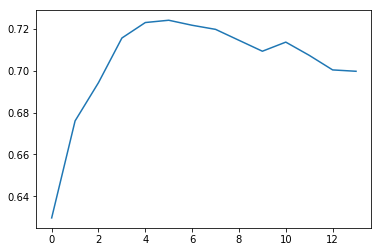

In [71]:
plt.plot(range(len(results)), results)
plt.show()

In [69]:
results = []
for depth in range(1,15):
    dt = DecisionTree()
    dt.max_depth = depth
    dt.min_samples_split = 2 # nombre minimum d ’ exemples pour spliter un noeud
    results.append(validation_croisee(datax, datay, dt, 5))

In [72]:
plt.plot(range(len(results)), results)
plt.xlabel("Maximum profondeur de l'arbre")
plt.ylabel("Precision")
plt.legend()
plt.savefig("/Users/samutamminen/Documents/Study/Sorbonne/S2/ARF/TME/compte_rendu/TME1_6/images/partition_vc.png")

No handles with labels found to put in legend.
